# My original perfectly-median solution: recursive in-order traversal

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def __init__(self):
        self.idx = 0
        self.val = None
    def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        if root is not None:
            self.kthSmallest(root.left,k)
            self.idx += 1
            if self.idx == k:
                self.val = root.val
            else:
                pass
            self.kthSmallest(root.right,k)
        else:
            pass
        return self.val

# optimal solution that works in O(log n) time: convert to a loop and terminate prematurely to avoid doing the full in-order traversal

## Approach 2: Iterative Inorder Traversal
The above recursion could be converted into iteration, with the help of stack. This way one could speed up the solution because there is no need to build the entire inorder traversal, and one could stop after the kth element.

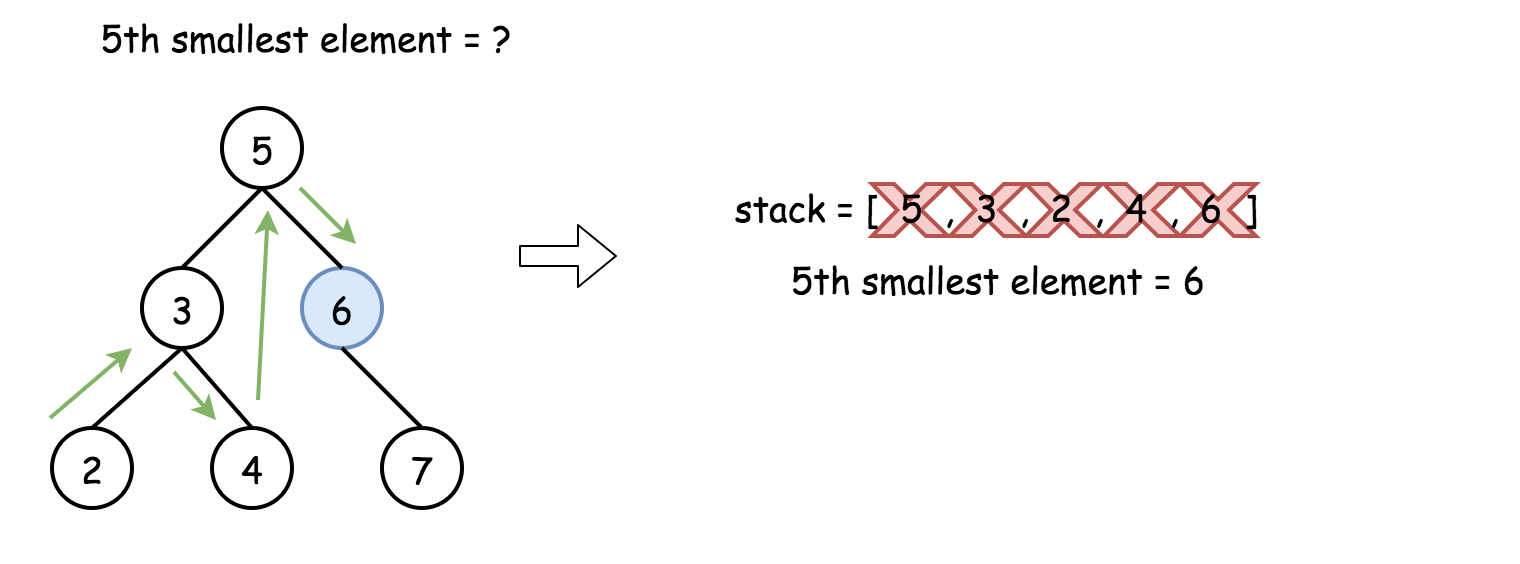

## Complexity Analysis

Time complexity: O(H + k), where H is a tree height. This complexity is defined by the stack, which contains at least H + k elements, since before starting to pop out one has to go down to a leaf. This results in O(logN+k) for the balanced tree and O(N+k) for completely unbalanced tree with all the nodes in the left subtree.
Space complexity: O(H) to keep the stack, where HH is a tree height. That makes O(N) in the worst case of the skewed tree, and O(logN) in the average case of the balanced tree.

In [ ]:
class Solution:
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        stack = []
        
        while True: # bad form, no?
            while root:
                stack.append(root)
                root = root.left
            root = stack.pop() # O(logN) complexity, given H ~ logN (and, of course, k << N)
            k -= 1 # i assume this is local-scope only? otherwise, bad form!
            if not k:
                return root.val
            root = root.right